In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cartopy
import cartopy.crs as ccrs
import xarray as xr
import matplotlib
from netCDF4 import Dataset
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import gridspec
import matplotlib.colors as colors

In [2]:
piline=[11,41,72,102,133,164,194,225,255,286,317,345]
mhline=[12,43,74,103,133,162,191,221,251,283,315,345]
ligline=[12,41,70,97,125,154,183,215,247,281,315,345]

In [2]:
monlocation=[15,45,74,105,135,166,196,227,258,288,319,349]
monname=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']


In [9]:
monlocation=[0,26,56,87,117,148,179,209,240,270,301,331,360]
monname=["Mar 21$^{st}$",'Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Jan','Feb','Mar']
monlocation1=[0]


In [4]:
fi = xr.open_dataset('data/insolation180.nc',decode_times=False)
day=fi['day']
lat=fi['lat']
pi1=fi['piControl']
lig1=fi['lig127k']
mh1=fi['midHolocene']
lig=fi['lig127k']*0
mh=fi['midHolocene']*0
pi=fi['piControl']*0

In [ ]:
LIG=np.zeros((180,365))
LIG[:,0:6]=lig1[:,365-6:365]
LIG[:,6:365]=lig1[:,0:365-6]
lig.values=LIG


In [5]:
LIG=np.zeros((180,365))
LIG[:,0:276]=lig1[:,89:365]
LIG[:,276:365]=lig1[:,0:89]
lig.values=LIG
MH=np.zeros((180,365))
MH[:,0:276]=mh1[:,89:365]
MH[:,276:365]=mh1[:,0:89]
mh.values=MH
PI=np.zeros((180,365))
PI[:,0:276]=pi1[:,89:365]
PI[:,276:365]=pi1[:,0:89]
pi.values=PI

In [24]:
MH=np.zeros((180,365))
MH[:,0:4]=mh1[:,365-4:365]
MH[:,4:365]=mh1[:,0:365-4]
mh.values=MH


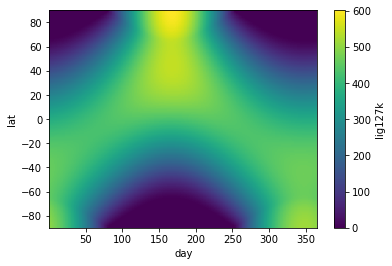

In [12]:
lig1.plot()

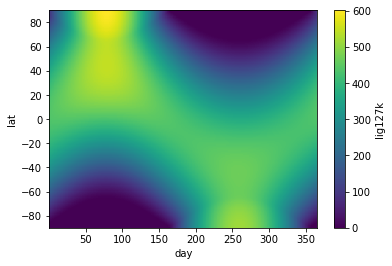

In [13]:
lig.plot()

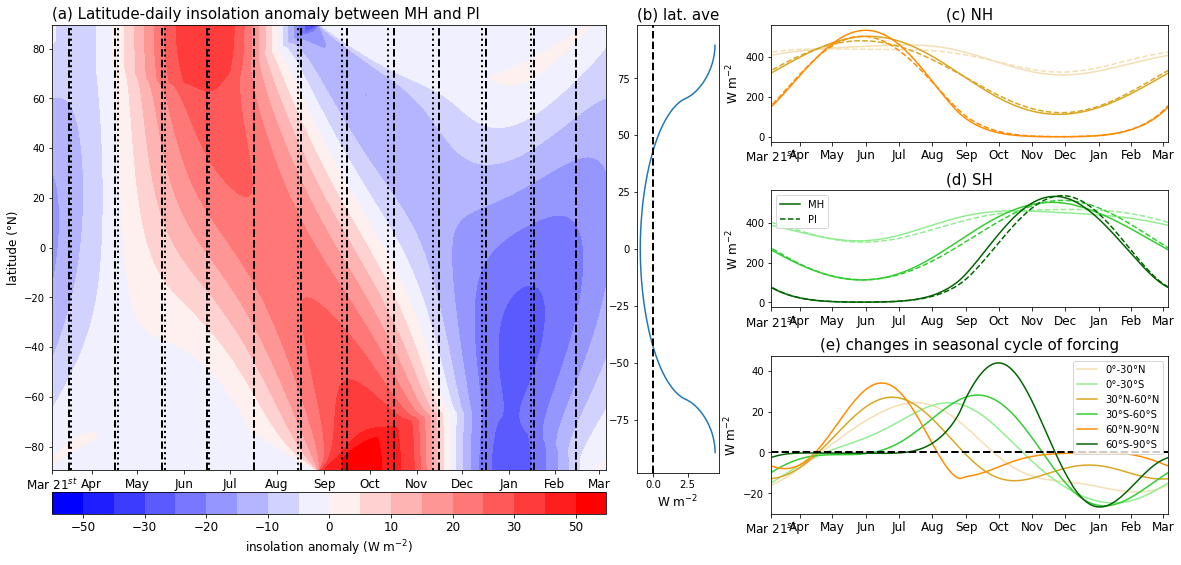

In [21]:
fig=plt.figure(figsize=(20,9))

cmap=plt.get_cmap('bwr')
bounds =[-100,-50,-40,-30,-25,-20,-15,-10,-5,0,5,10,15,20,25,30,40,50,100]
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)

ax1=plt.subplot2grid((12, 24), (0, 0),colspan=12, rowspan=12)
fig1=ax1.contourf(day,lat,mh-pi,levels=bounds,cmap=cmap,norm=norm)
ax1.set_title('(a) Latitude-daily insolation anomaly between MH and PI',loc='left',fontsize=15)
ax1.set_xticks(monlocation)
ax1.set_xticklabels(monname, fontsize=12)
for i in range(12):
    ax1.axvline(x=piline[i],color='k',linestyle="dashed",linewidth=2)
    ax1.axvline(x=mhline[i],color='k',linestyle='dotted',linewidth=2)
ax1.set_ylabel('latitude (%sN)'%chr(176),fontsize=12 )
divider = make_axes_locatable(ax1)
cax = divider.new_vertical(size="5%", pad=0.3, pack_start=True)
fig.add_axes(cax)
cb=fig.colorbar(fig1, cax=cax, orientation="horizontal")
cb.ax.tick_params(labelsize=12)
cblabel='insolation anomaly (W m$^{-2}$)'
cb.set_label(cblabel,fontsize=12)

ax2=plt.subplot2grid((12, 25), (0, 13), rowspan=11,colspan=2)
fig2=ax2.plot(np.average(mh-pi,axis=1),lat)
ax2.axvline(x=0,color='black',linestyle="--",linewidth=2)
ax2.set_xlabel('W m$^{-2}$', fontsize=12)
ax2.set_title('(b) lat. ave',fontsize=15)
#ax2.set_ylabel('latitude (%sN)'%chr(176),fontsize=12 )

diff=np.array(mh-pi)
s30=np.average(diff[60:90],axis=0)
n30=np.average(diff[90:120],axis=0)

s60=np.average(diff[30:60],axis=0)
n60=np.average(diff[120:150],axis=0)

s90=np.average(diff[0:30],axis=0)
n90=np.average(diff[150:180],axis=0)

ax5=plt.subplot2grid((12, 25), (0, 16), rowspan=3,colspan=9)
ax5.plot(day,np.average(mh[90:120],axis=0),color='wheat',ls='solid')#,label='MH 0-30%sN'%(chr(176)))
ax5.plot(day,np.average(pi[90:120],axis=0),color='wheat',ls='dashed')#,label='PI 0-30%sN'%(chr(176)))
ax5.plot(day,np.average(mh[120:150],axis=0),color='goldenrod',ls='solid')#,label='MH 30-60%sN'%(chr(176)))
ax5.plot(day,np.average(pi[120:150],axis=0),color='goldenrod',ls='dashed')#,label='PI 30-60%sN'%(chr(176)))
ax5.plot(day,np.average(mh[150:180],axis=0),color='darkorange',ls='solid')#,label='MH 60-90%sN'%(chr(176)))
ax5.plot(day,np.average(pi[150:180],axis=0),color='darkorange',ls='dashed')#,label='PI 60-90%sN'%(chr(176)))
ax5.set_xticks(monlocation)
ax5.set_xlim([0,365])
ax5.set_xticklabels(monname, fontsize=12)
ax5.set_title('(c) NH',fontsize=15)
ax5.set_ylabel('W m$^{-2}$', fontsize=12 )
#ax5.legend()

ax4=plt.subplot2grid((12, 25), (4, 16), rowspan=3,colspan=9)
ax4.plot(day,np.average(mh[60:90],axis=0),color='lightgreen',ls='solid')#,label='MH 0-30%sS'%(chr(176)))
ax4.plot(day,np.average(pi[60:90],axis=0),color='lightgreen',ls='dashed')#,label='PI 0-30%sS'%(chr(176)))
ax4.plot(day,np.average(mh[30:60],axis=0),color='limegreen',ls='solid')#,label='MH 30-60%sS'%(chr(176)))
ax4.plot(day,np.average(pi[30:60],axis=0),color='limegreen',ls='dashed')#,label='PI 30-60%sS'%(chr(176)))
ax4.plot(day,np.average(mh[0:30],axis=0),color='darkgreen',ls='solid',label='MH')#,label='MH 60-90%sS'%(chr(176)))
ax4.plot(day,np.average(pi[0:30],axis=0),color='darkgreen',ls='dashed',label='PI')#,label='PI 60-90%sS'%(chr(176)))
ax4.set_xlim([0,365])
ax4.set_xticks(monlocation)
ax4.set_xticklabels(monname, fontsize=12)
ax4.set_title('(d) SH',fontsize=15)
ax4.set_ylabel('W m$^{-2}$', fontsize=12 )
ax4.legend()




ax3=plt.subplot2grid((12, 25), (8, 16), rowspan=4,colspan=9)
ax3.plot(day,n30,'wheat',label='0%s-30%sN'%(chr(176),chr(176)))
ax3.plot(day,s30,'lightgreen',label='0%s-30%sS'%(chr(176),chr(176)))
ax3.plot(day,n60,'goldenrod',label='30%sN-60%sN'%(chr(176),chr(176)))
ax3.plot(day,s60,'limegreen',label='30%sS-60%sS'%(chr(176),chr(176)))
ax3.plot(day,n90,'darkorange',label='60%sN-90%sN'%(chr(176),chr(176)))
ax3.plot(day,s90,'darkgreen',label='60%sS-90%sS'%(chr(176),chr(176)))
ax3.set_xlim([0,365])
ax3.axhline(y=0,color='black',linestyle="--",linewidth=2)
ax3.set_xticks(monlocation)
ax3.set_xticklabels(monname, fontsize=12)
ax3.set_title('(e) changes in seasonal cycle of forcing',fontsize=15)
ax3.set_ylabel('W m$^{-2}$', fontsize=12 )

ax3.legend()



plt.savefig('insofig/mh_insolation.png')
plt.savefig('insofig/mh_insolation.pdf')  

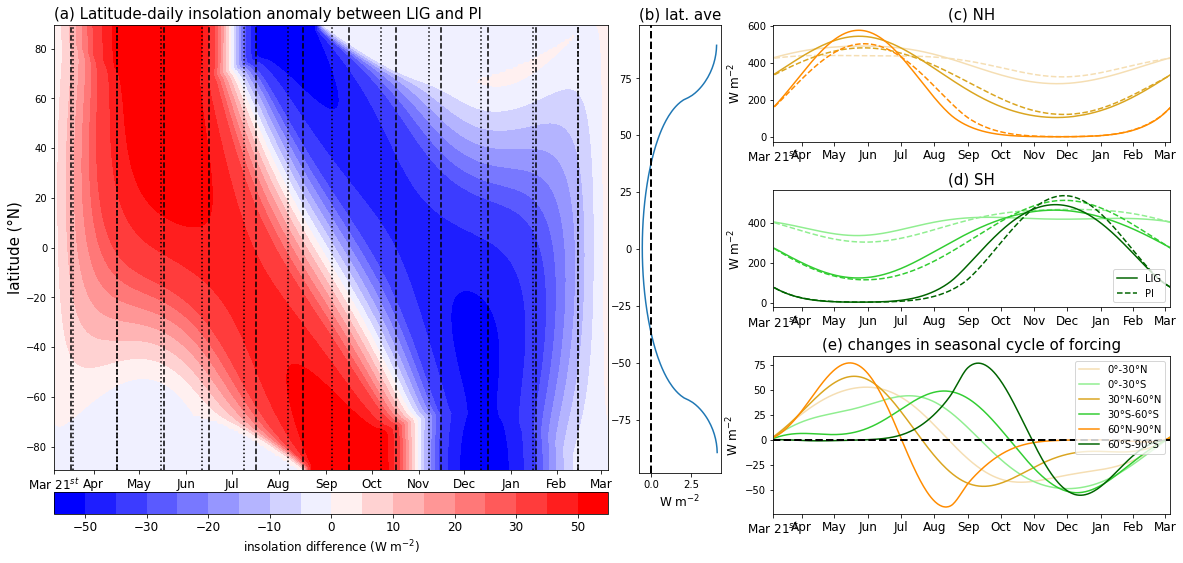

In [23]:
# lig
fig=plt.figure(figsize=(20,9))

cmap=plt.get_cmap('bwr')
bounds =[-200,-50,-40,-30,-25,-20,-15,-10,-5,0,5,10,15,20,25,30,40,50,200]
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)

ax1=plt.subplot2grid((12, 24), (0, 0),colspan=12, rowspan=12)
fig1=ax1.contourf(day,lat,lig-pi,levels=bounds,cmap=cmap,norm=norm)
ax1.set_xticks(monlocation)
ax1.set_xticklabels(monname, fontsize=12)
ax1.set_title('(a) Latitude-daily insolation anomaly between LIG and PI',loc='left',fontsize=15)
for i in range(12):
    ax1.axvline(x=piline[i],color='k',linestyle="dashed",linewidth=1.5)
    ax1.axvline(x=ligline[i],color='k',linestyle='dotted',linewidth=1.5)
ax1.set_ylabel('latitude (%sN)'%chr(176),fontsize=15 )
divider = make_axes_locatable(ax1)
cax = divider.new_vertical(size="5%", pad=0.3, pack_start=True)
fig.add_axes(cax)
cb=fig.colorbar(fig1, cax=cax, orientation="horizontal")
cb.ax.tick_params(labelsize=12)
cblabel='insolation difference (W m$^{-2}$)'
cb.set_label(cblabel,fontsize=12)

ax2=plt.subplot2grid((12, 25), (0, 13), rowspan=11,colspan=2)
fig2=ax2.plot(np.average(lig-pi,axis=1),lat)
ax2.axvline(x=0,color='black',linestyle="--",linewidth=2)
ax2.set_xlabel('W m$^{-2}$', fontsize=12)
ax2.set_title('(b) lat. ave',fontsize=15)
#ax2.set_ylabel('latitude (%sN)'%chr(176),fontsize=12 )

diff=np.array(lig-pi)
s30=np.average(diff[60:90],axis=0)
n30=np.average(diff[90:120],axis=0)

s60=np.average(diff[30:60],axis=0)
n60=np.average(diff[120:150],axis=0)

s90=np.average(diff[0:30],axis=0)
n90=np.average(diff[150:180],axis=0)

ax5=plt.subplot2grid((12, 25), (0, 16), rowspan=3,colspan=9)
ax5.plot(day,np.average(lig[90:120],axis=0),color='wheat',ls='solid')#,label='MH 0-30%sN'%(chr(176)))
ax5.plot(day,np.average(pi[90:120],axis=0),color='wheat',ls='dashed')#,label='PI 0-30%sN'%(chr(176)))
ax5.plot(day,np.average(lig[120:150],axis=0),color='goldenrod',ls='solid')#,label='MH 30-60%sN'%(chr(176)))
ax5.plot(day,np.average(pi[120:150],axis=0),color='goldenrod',ls='dashed')#,label='PI 30-60%sN'%(chr(176)))
ax5.plot(day,np.average(lig[150:180],axis=0),color='darkorange',ls='solid')#,label='MH 60-90%sN'%(chr(176)))
ax5.plot(day,np.average(pi[150:180],axis=0),color='darkorange',ls='dashed')#,label='PI 60-90%sN'%(chr(176)))
ax5.set_xticks(monlocation)
ax5.set_xlim([0,365])
ax5.set_xticklabels(monname, fontsize=12)
ax5.set_title('(c) NH',fontsize=15)
ax5.set_ylabel('W m$^{-2}$', fontsize=12 )
#ax5.legend()

ax4=plt.subplot2grid((12, 25), (4, 16), rowspan=3,colspan=9)
ax4.plot(day,np.average(lig[60:90],axis=0),color='lightgreen',ls='solid')#,label='MH 0-30%sS'%(chr(176)))
ax4.plot(day,np.average(pi[60:90],axis=0),color='lightgreen',ls='dashed')#,label='PI 0-30%sS'%(chr(176)))
ax4.plot(day,np.average(lig[30:60],axis=0),color='limegreen',ls='solid')#,label='MH 30-60%sS'%(chr(176)))
ax4.plot(day,np.average(pi[30:60],axis=0),color='limegreen',ls='dashed')#,label='PI 30-60%sS'%(chr(176)))
ax4.plot(day,np.average(lig[0:30],axis=0),color='darkgreen',ls='solid',label='LIG')#,label='MH 60-90%sS'%(chr(176)))
ax4.plot(day,np.average(pi[0:30],axis=0),color='darkgreen',ls='dashed',label='PI')#,label='PI 60-90%sS'%(chr(176)))
ax4.set_xlim([0,365])
ax4.set_xticks(monlocation)
ax4.set_xticklabels(monname, fontsize=12)
ax4.set_title('(d) SH',fontsize=15)
ax4.set_ylabel('W m$^{-2}$', fontsize=12 )
ax4.legend()




ax3=plt.subplot2grid((12, 25), (8, 16), rowspan=4,colspan=9)
ax3.plot(day,n30,'wheat',label='0%s-30%sN'%(chr(176),chr(176)))
ax3.plot(day,s30,'lightgreen',label='0%s-30%sS'%(chr(176),chr(176)))
ax3.plot(day,n60,'goldenrod',label='30%sN-60%sN'%(chr(176),chr(176)))
ax3.plot(day,s60,'limegreen',label='30%sS-60%sS'%(chr(176),chr(176)))
ax3.plot(day,n90,'darkorange',label='60%sN-90%sN'%(chr(176),chr(176)))
ax3.plot(day,s90,'darkgreen',label='60%sS-90%sS'%(chr(176),chr(176)))
ax3.set_xlim([0,365])
ax3.axhline(y=0,color='black',linestyle="--",linewidth=2)
ax3.set_xticks(monlocation)
ax3.set_xticklabels(monname, fontsize=12)
ax3.set_title('(e) changes in seasonal cycle of forcing',fontsize=15)
ax3.set_ylabel('W m$^{-2}$', fontsize=12 )

ax3.legend()



plt.savefig('insofig/lig_insolation.png')
plt.savefig('insofig/lig_insolation.pdf')  

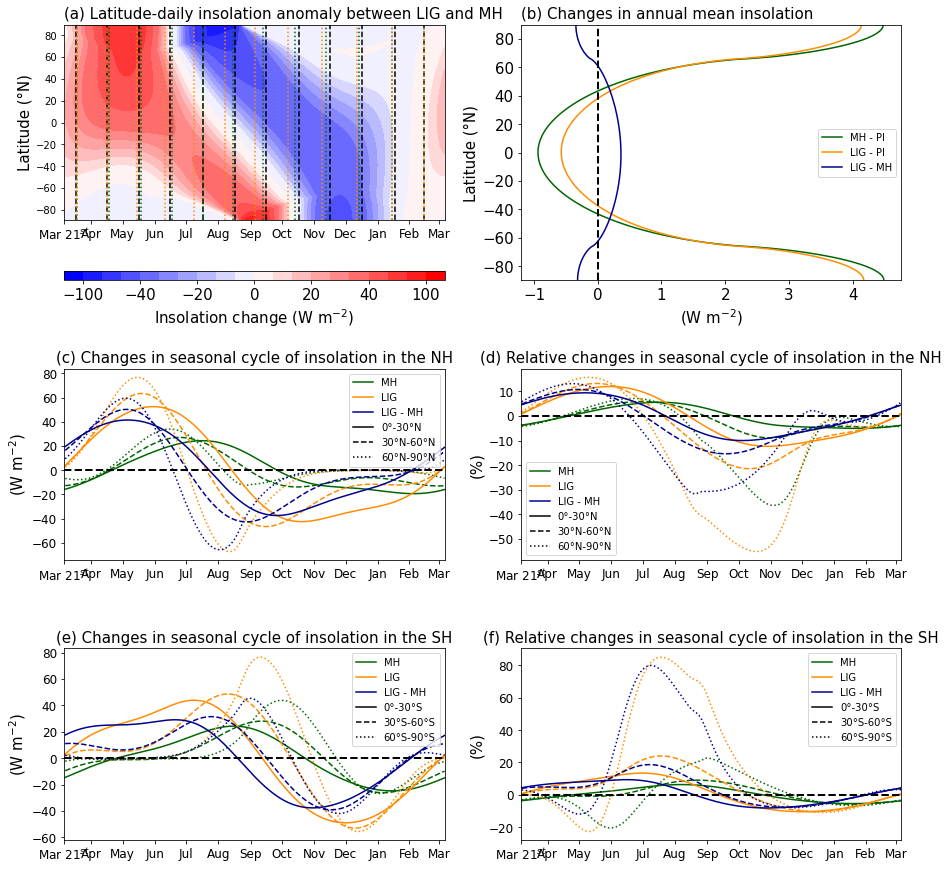

In [26]:
fig=plt.figure(figsize=(15,15))

gs = gridspec.GridSpec(5,2,height_ratios=[8,1,6,1,6],width_ratios=[1,1]) 

#ax2=plt.subplot2grid((16,16), (0, 1), rowspan=15,colspan=3)
#fig2=ax2.plot(np.average(mh-pi,axis=1),lat,color='green',label='6 ka - 0 ka')
#fig2=ax2.plot(np.average(lig-pi,axis=1),lat,color='orange',label='127 ka - 0 ka')
#ax2.axvline(x=0,color='black',linestyle="--",linewidth=2)
#ax2.set_xlabel('W m$^{-2}$', fontsize=15)
#ax2.set_title('(a) lat. ave',fontsize=20)
#plt.legend()
#ax2.set_ylim([-90,90])
#ax2.set_ylabel('latitude (%sN)'%chr(176),fontsize=12 )
#plt.ylabel('Latitude (%sN)'%chr(176),fontsize=15)

#plt.xlabel('W m$^{-2}$',fontsize=15)
#plt.xticks(fontsize=12)
#plt.yticks(fontsize=12)

diffml=np.array(lig-mh)
diffm=np.array(mh-pi)
cmap22=plt.get_cmap('Spectral_r')
cmap1=plt.get_cmap('bwr')
bounds1 =[-100000,-100,-75,-50,-40,-30,-25,-20,-15,-10,0,10,15,20,25,30,40,50,75,100,100000]
norm1 = colors.BoundaryNorm(boundaries=bounds1, ncolors=256)
cmap2=plt.get_cmap('coolwarm')
bounds2 =[-100,-20,-18,-16,-14,-12,-10,-8,-6,-4,-2,0,2,4,6,8,10,12,14,16,18,20,100]
norm2 = colors.BoundaryNorm(boundaries=bounds2, ncolors=256)

ax11=plt.subplot(gs[0])
fig11=ax11.contourf(day,lat,lig-mh,levels=bounds1,cmap=cmap1,norm=norm1)
ax11.set_xticks(monlocation)
ax11.set_xticklabels(monname, fontsize=12)
ax11.set_title('(a) Latitude-daily insolation anomaly between LIG and MH',loc='left',fontsize=15)
for i in range(12):
    ax11.axvline(x=piline[i],color='k',linestyle="dashed",linewidth=1.5)
    ax11.axvline(x=mhline[i],color='darkgreen',linestyle='dotted',linewidth=1.5)
    ax11.axvline(x=ligline[i],color='darkorange',linestyle='dotted',linewidth=1.5)
ax11.set_ylabel('Latitude (%sN)'%chr(176),fontsize=15 )
divider11 = make_axes_locatable(ax11)
cax11 = divider11.new_vertical(size="5%", pad=0.7, pack_start=True)
fig.add_axes(cax11)
cb11=fig.colorbar(fig11, cax=cax11, orientation="horizontal")
cb11.ax.tick_params(labelsize=15)
#cblabel11='Relative change (%)'
cblabel11='Insolation change (W m$^{-2}$)'
cb11.set_label(cblabel11,fontsize=15)

ax12=plt.subplot(gs[1])
ax12.plot(np.average(mh-pi,axis=1),lat,'darkgreen',ls='solid',label='MH - PI')

ax12.plot(np.average(lig-pi,axis=1),lat,'darkorange',ls='solid',label='LIG - PI')

ax12.plot(np.average(lig-mh,axis=1),lat,'darkblue',ls='solid',label='LIG - MH')

ax12.set_ylim([-90,90])
ax12.axvline(x=0,color='black',linestyle="--",linewidth=2)

ax12.set_title('(b) Changes in annual mean insolation',fontsize=15,loc='left')
ax12.set_ylabel('Latitude (%sN)'%chr(176), fontsize=15 )
ax12.set_xlabel('(W m$^{-2}$)', fontsize=15 )

ax12.legend()
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)






s30m=np.average(diffm[60:90],axis=0)
n30m=np.average(diffm[90:120],axis=0)

s60m=np.average(diffm[30:60],axis=0)
n60m=np.average(diffm[120:150],axis=0)

s90m=np.average(diffm[0:30],axis=0)
n90m=np.average(diffm[150:180],axis=0)

diffl=np.array(lig-pi)

s30l=np.average(diffl[60:90],axis=0)
n30l=np.average(diffl[90:120],axis=0)

s60l=np.average(diffl[30:60],axis=0)
n60l=np.average(diffl[120:150],axis=0)

s90l=np.average(diffl[0:30],axis=0)
n90l=np.average(diffl[150:180],axis=0)

s30pi=np.average(pi[60:90],axis=0)
n30pi=np.average(pi[90:120],axis=0)

s60pi=np.average(pi[30:60],axis=0)
n60pi=np.average(pi[120:150],axis=0)

s90pi=np.average(pi[0:30],axis=0)
n90pi=np.average(pi[150:180],axis=0)

ax13=plt.subplot(gs[4])
ax13.plot(day,n30m,'darkgreen')
ax13.plot(day,n60m,'darkgreen',ls='dashed')
ax13.plot(day,n90m,'darkgreen',ls='dotted')

ax13.plot(day,n30l,'darkorange')
ax13.plot(day,n60l,'darkorange',ls='dashed')
ax13.plot(day,n90l,'darkorange',ls='dotted')
ax13.plot(day,n30l-n30m,'darkblue')
ax13.plot(day,n60l-n60m,'darkblue',ls='dashed')
ax13.plot(day,n90l-n90m,'darkblue',ls='dotted')
plt.plot([400,401],[0,0],'darkgreen',ls='solid',label='MH')
plt.plot([400,401],[0,0],'darkorange',ls='solid',label='LIG')
plt.plot([400,401],[0,0],'darkblue',ls='solid',label='LIG - MH')


ax13.set_xlim([0,365])
ax13.axhline(y=0,color='black',linestyle="--",linewidth=2)
ax13.set_xticks(monlocation)
ax13.set_xticklabels(monname, fontsize=15)
ax13.set_title('(c) Changes in seasonal cycle of insolation in the NH',fontsize=15)
ax13.set_ylabel('(W m$^{-2}$)', fontsize=15 )
ax13.plot([-10,-11],[0,0],'k',label='0%s-30%sN'%(chr(176),chr(176)))
ax13.plot([-10,-11],[0,0],'k',ls='dashed',label='30%sN-60%sN'%(chr(176),chr(176)))
ax13.plot([-10,-11],[0,0],'k',ls='dotted',label='60%sN-90%sN'%(chr(176),chr(176)))

ax13.legend()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)



#ax3=plt.subplot2grid((16,16), (0,1), rowspan=7,colspan=15)
ax3=plt.subplot(gs[5])
ax3.plot(day,100*n30m/n30pi,'darkgreen')
ax3.plot(day,100*n60m/n60pi,'darkgreen',ls='dashed')
ax3.plot(day,100*n90m/n90pi,'darkgreen',ls='dotted')

ax3.plot(day,100*n30l/n30pi,'darkorange')
ax3.plot(day,100*n60l/n60pi,'darkorange',ls='dashed')
ax3.plot(day,100*n90l/n90pi,'darkorange',ls='dotted')
plt.plot([400,401],[0,0],'darkgreen',ls='solid',label='MH')
plt.plot([400,401],[0,0],'darkorange',ls='solid',label='LIG')
plt.plot([400,401],[0,0],'darkblue',ls='solid',label='LIG - MH')

ax3.plot(day,100*n30l/n30pi - 100*n30m/n30pi,'darkblue')
ax3.plot(day,100*n60l/n60pi - 100*n60m/n60pi,'darkblue',ls='dashed')
ax3.plot(day,100*n90l/n90pi - 100*n90m/n90pi,'darkblue',ls='dotted')
ax3.set_xlim([0,365])
ax3.axhline(y=0,color='black',linestyle="--",linewidth=2)
ax3.set_xticks(monlocation)
ax3.set_xticklabels(monname, fontsize=15)
ax3.set_title('(d) Relative changes in seasonal cycle of insolation in the NH',fontsize=15)
ax3.set_ylabel('(%)', fontsize=15 )
ax3.plot([-10,-11],[0,0],'k',label='0%s-30%sN'%(chr(176),chr(176)))
ax3.plot([-10,-11],[0,0],'k',ls='dashed',label='30%sN-60%sN'%(chr(176),chr(176)))
ax3.plot([-10,-11],[0,0],'k',ls='dotted',label='60%sN-90%sN'%(chr(176),chr(176)))

ax3.legend()
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


ax41=plt.subplot(gs[8])
#ax4=plt.subplot2grid((16,16), (9,1), rowspan=7,colspan=15)
ax41.plot(day,s30m,'darkgreen')
ax41.plot(day,s60m,'darkgreen',ls='dashed')
ax41.plot(day,s90m,'darkgreen',ls='dotted')
ax41.plot(day,s30l,'darkorange')
ax41.plot(day,s60l,'darkorange',ls='dashed')
ax41.plot(day,s90l,'darkorange',ls='dotted')
ax41.plot(day,s30l-s30m,'darkblue')
ax41.plot(day,s60l-s60m,'darkblue',ls='dashed')
ax41.plot(day,s90l-s90m,'darkblue',ls='dotted')
plt.plot([400,401],[0,0],'darkgreen',ls='solid',label='MH')
plt.plot([400,401],[0,0],'darkorange',ls='solid',label='LIG')
plt.plot([400,401],[0,0],'darkblue',ls='solid',label='LIG - MH')
ax41.plot([-10,-11],[0,0],'k',label='0%s-30%sS'%(chr(176),chr(176)))
ax41.plot([-10,-11],[0,0],'k',ls='dashed',label='30%sS-60%sS'%(chr(176),chr(176)))
ax41.plot([-10,-11],[0,0],'k',ls='dotted',label='60%sS-90%sS'%(chr(176),chr(176)))



ax41.set_xlim([0,365])
ax41.axhline(y=0,color='black',linestyle="--",linewidth=2)
ax41.set_xticks(monlocation)
ax41.set_xticklabels(monname, fontsize=15)
ax41.set_title('(e) Changes in seasonal cycle of insolation in the SH',fontsize=15)
ax41.set_ylabel('(W m$^{-2}$)', fontsize=15 )

ax41.legend()

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)





ax4=plt.subplot(gs[9])
#ax4=plt.subplot2grid((16,16), (9,1), rowspan=7,colspan=15)
ax4.plot(day,100*s30m/s30pi,'darkgreen')
ax4.plot(day,100*s60m/s60pi,'darkgreen',ls='dashed')
ax4.plot(day,100*s90m/s90pi,'darkgreen',ls='dotted')
ax4.plot(day,100*s30l/s30pi,'darkorange')
ax4.plot(day,100*s60l/s60pi,'darkorange',ls='dashed')
ax4.plot(day,100*s90l/s90pi,'darkorange',ls='dotted')
ax4.plot(day,100*s30l/s30pi - 100*s30m/s30pi,'darkblue')
ax4.plot(day,100*s60l/s60pi - 100*s60m/s60pi,'darkblue',ls='dashed')
ax4.plot(day,100*s90l/s90pi - 100*s90m/s90pi,'darkblue',ls='dotted')
plt.plot([400,401],[0,0],'darkgreen',ls='solid',label='MH')
plt.plot([400,401],[0,0],'darkorange',ls='solid',label='LIG')
plt.plot([400,401],[0,0],'darkblue',ls='solid',label='LIG - MH')
ax4.plot([-10,-11],[0,0],'k',label='0%s-30%sS'%(chr(176),chr(176)))
ax4.plot([-10,-11],[0,0],'k',ls='dashed',label='30%sS-60%sS'%(chr(176),chr(176)))
ax4.plot([-10,-11],[0,0],'k',ls='dotted',label='60%sS-90%sS'%(chr(176),chr(176)))



ax4.set_xlim([0,365])
ax4.axhline(y=0,color='black',linestyle="--",linewidth=2)
ax4.set_xticks(monlocation)
ax4.set_xticklabels(monname, fontsize=15)
ax4.set_title('(f) Relative changes in seasonal cycle of insolation in the SH',fontsize=15)
ax4.set_ylabel('(%)', fontsize=15 )

ax4.legend()

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)



plt.savefig('insofig/insolation_relative.png')
plt.savefig('insofig/insolation_relative.pdf') 